# Evaluation Notebook
## Irrigation Capstone Fall 2020
### TP Goter

This notebook is used for processing results from supervised and unsupervised models. We do this by plotting training and validation metrics by epoch for the supervised and finetuned models. We also evaluate models against our test set and look at AUC. What we are after is identifying what parameters during unsupervised training and finetuning lead to the highest overall AUC as compared to our supervised baseline which is identified in the cells below.

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix


sns.set()

print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'sci-kit learn version: {sklearn.__version__}')
print(f'Tensorflow version: {tf.__version__}')

Pandas version: 1.1.2
Numpy version: 1.18.5
sci-kit learn version: 0.23.1
Tensorflow version: 2.3.1


## Models Stored at the Path Below

In [34]:
model_path = './models'
os.listdir(model_path)

['bl_inc_aug_blur_0.pkl',
 'pooled_resnet50_balanced_val_1.h5',
 'pooled_inceptionv3_balanced_val_4.h5',
 'simclr_resnet101_1.pkl',
 'bl_inc_aug_simclr2_pool_0.pkl',
 'bl_inc_aug_all_df_0.h5',
 'pooled_inceptionv3_balanced_val_0.h5',
 'bl_inc_aug_simclr2_0.pkl',
 'pooled_resnet50_balanced_val_4.h5',
 'pooled_inceptionv3_balanced_val_1.h5',
 '.DS_Store',
 'pooled_inception_balanced_val_all.pkl',
 'pooled_resnet50_balanced_val_0.h5',
 'bl_inc_aug_shift_0.h5',
 'twolayer_finetune_13percent_resnet101_1.pkl',
 'bl_inc_aug_chanshift_0.pkl',
 'bl_inc_aug_simclr2_0.h5',
 'bl_inc_aug_blur_0.h5',
 'bl_inc_aug_simclr_df_0.pkl',
 'pooled_inception_balanced_val_all.h5',
 'pooled_resnet50_balanced_val_4.pkl',
 'simclr_finetune_13percent_do50_lr0001_30ep.pkl',
 'simclr_20_aug2.h5',
 'simclr_finetune_3percent_do50.pkl',
 'simclr_finetune_13percent_aug3.pkl',
 'simclr_resnet101v2_20_aug5v2.h5',
 'pooled_resnet50_balanced_val_3.pkl',
 'pooled_resnet50_balanced_val_all.pkl',
 'simclr_resnet101_1.h5',
 's

## Function to Plot Metrics by Epoch

In [37]:
def plot_metrics(df, early_stop=False):
  '''
  Function for plotting the loss, auc, recall and precision by epoch
  for both training and validation sets. This function will work for both supervised
  and finetuned models.
  
  Input:
    df - Pandas DataFrame: This should contain metrics by epoch for our model.
  '''
  # Metrics are the column labels in the dataframe
  metrics = ['loss', 'auc', 'recall', 'precision']

  # Labels are show the metrics will show up in our plot legends
  labels = ['Loss',
            'AUC',
            'Recall',
            'Precision',
            'F1-Score']
  
  # had an issue with the loss column name, so rename in some cases
  if 0 in df.columns:
    df['loss'] = df.loc[:,0]
    
  # Create subplots for each metric
  fig, axes = plt.subplots(1,len(metrics)+1,
                           figsize=(len(metrics)*6,6),
                           sharex=True)
  
  # Flatten the axes object into a 1D array
  axes = axes.flatten()
  
  # Loop over the subplots an plot each metric individually for train/val data
  for a in range(len(metrics)):
    axes[a].scatter(df.index.values, df[metrics[a]], c='tab:cyan', label='Training')
    axes[a].scatter(df.index.values, df[f'val_{metrics[a]}'], c='tab:red', label='Validation')
    axes[a].legend()
    axes[a].set_ylabel(labels[a])
    if early_stop:
        axes[a].vlines(df.index.values[-1]-25,
                   df[metrics[a]].min(),
                   df[metrics[a]].max())
    
    # Scale the Y-limits for the loss plot
    if a==0:
      axes[a].set_ylim((0,2))
  
  # Calculate F1 score for training and validation sets
  f1_score = 2*df.precision*df.recall / (df.precision + df.recall)
  val_f1_score = 2*df.val_precision*df.val_recall / (df.val_precision + df.val_recall)
    
  # Plot F1-score  
  axes[-1].scatter(df.index.values,
                   f1_score,
                   c='tab:cyan',
                   label='Training')
  axes[-1].scatter(df.index.values,
                   val_f1_score,
                   c='tab:red',
                   label='Validation')
  
  axes[-1].legend()
  axes[-1].set_ylabel(labels[-1])
  if early_stop:
    axes[-1].vlines(df.index.values[-1]-25,
                       f1_score.min(),
                       f1_score.max())
  plt.subplots_adjust(wspace=0.30)

## Plot for Supervised Baseline - AUC ~0.97
Note that early stopping is used, so the black vertical lines represent the epoch from which the model weights were saved.

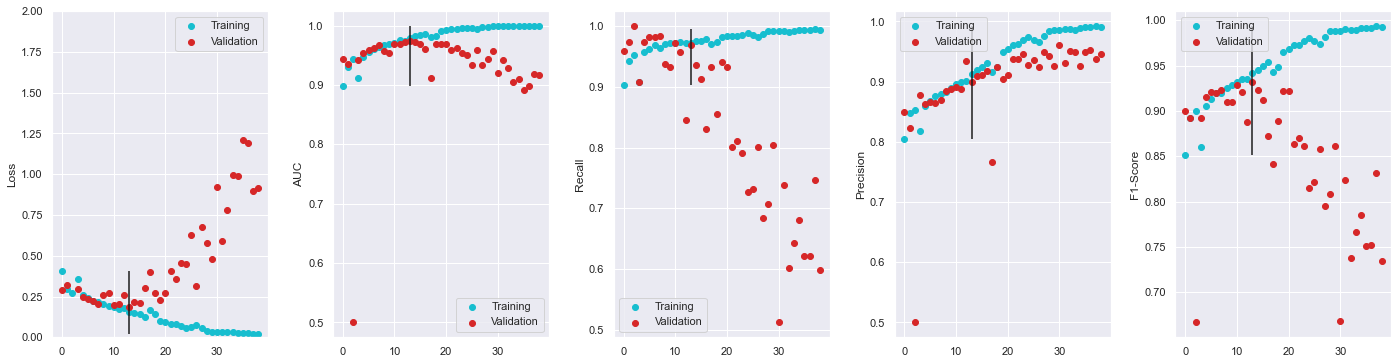

In [25]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'pooled_inception_balanced_val_all.pkl')), early_stop=True)

## Supervised Model with 13 Percent of Positive Class (640 total images)
## Supervised Model with 3 Percent of Positive Class (128 total images)

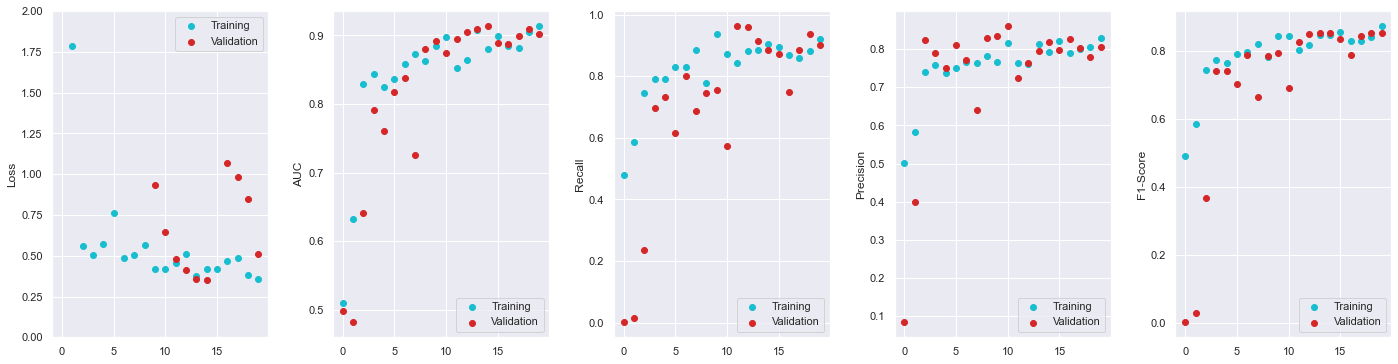

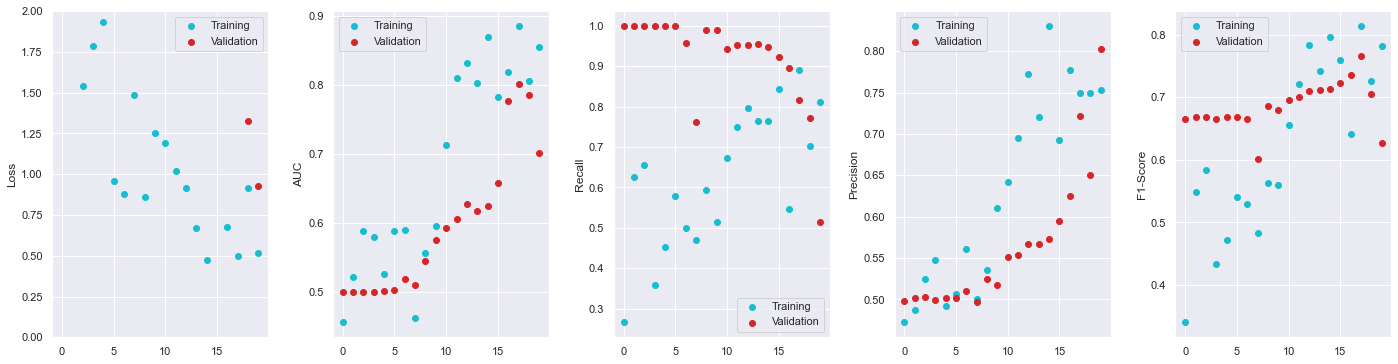

In [27]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'ResNet101V2_bl_13percent.pkl')))
plot_metrics(pd.read_pickle(os.path.join(model_path, 'ResNet101V2_bl_3percent.pkl')))

## Fine-tuned Model with 13 percent of Positive Class (640 total images)
### Fine-tuned Parameters
- Learning Rate: 0.001
- Drop Out Rate: 0.25
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- Epochs: 10
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

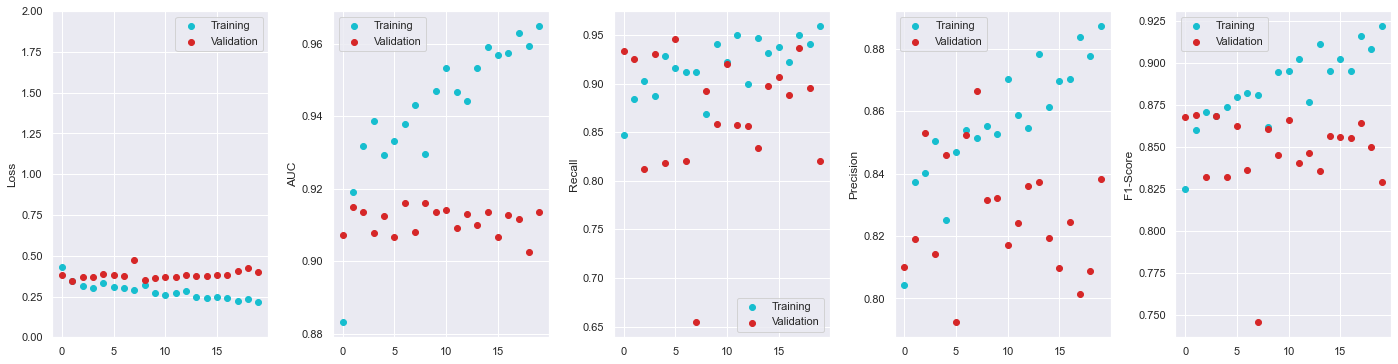

In [31]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'twolayer_finetune_13percent_resnet101_1.pkl')))

## Fine-tuned Model with 3 percent of Positive Class (128 total images)
Clearly with our first set of finetuned hyperparameters we are overfitting. So in the next set of studies, we increase dropout.
### Fine-tuned Parameters
- Learning Rate: 0.001
- Drop Out Rate: 0.25
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- Epochs: 10
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

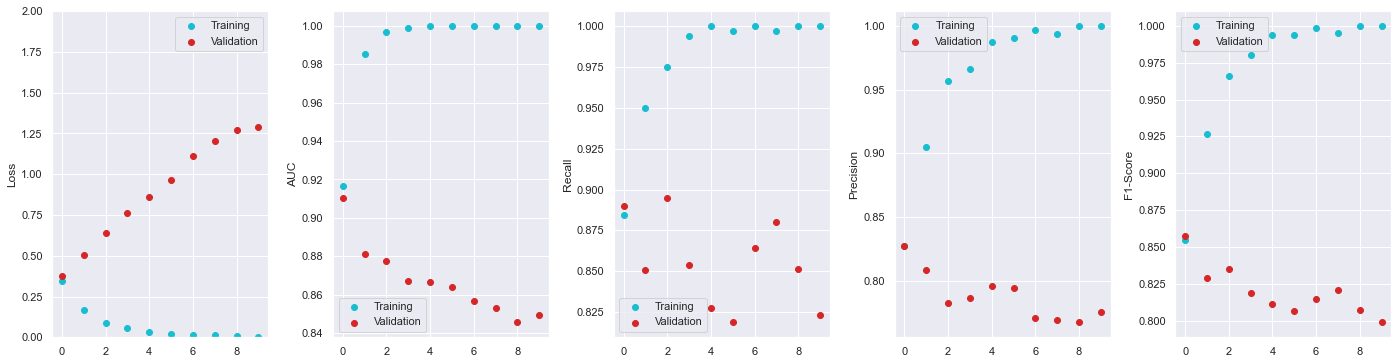

In [29]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_aug1_3percent.pkl')))

## Fine-tuned Model with 3 percent of Positive Class (128 total images)
Overfitting is significantly reduced with increased dropout. We achieve an AUC of ~0.91 with only 128 total training images! And even after just one epoch, our metrics show quite good performance. Training a supervised model with the same amount of data, we can only achieve an AUC of ~0.8. 
- Learning Rate: 0.001
- **Drop Out Rate: 0.50**
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- Epochs: 10
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

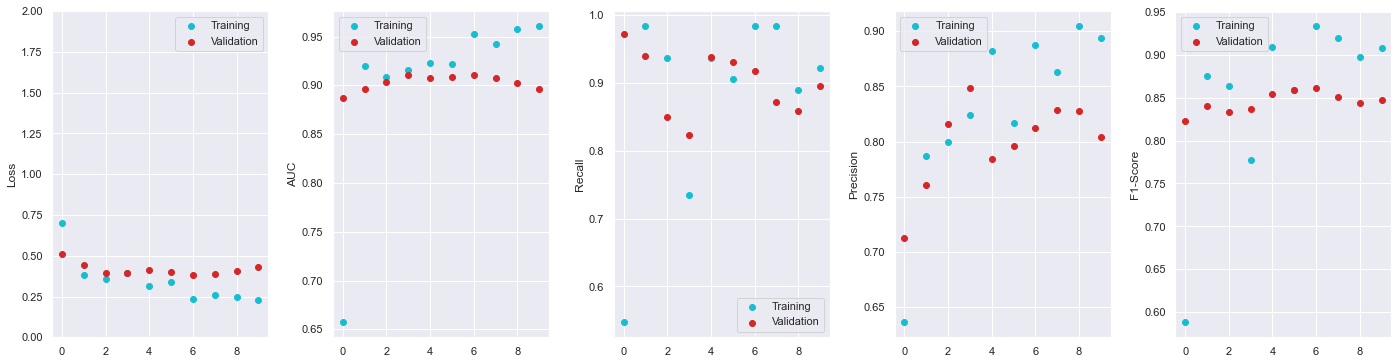

In [30]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_3percent_do50.pkl')))

## Fine-tuned Model with 3 percent of Positive Class (128 total images)
With increased dropout and decreased learning rate, we achieve similar results to those above but with slightly more stable validation set metrics. I would suggest using these finetuning parameters moving forward.
- **Learning Rate: 0.0001**
- **Drop Out Rate: 0.50**
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- Epochs: 10
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

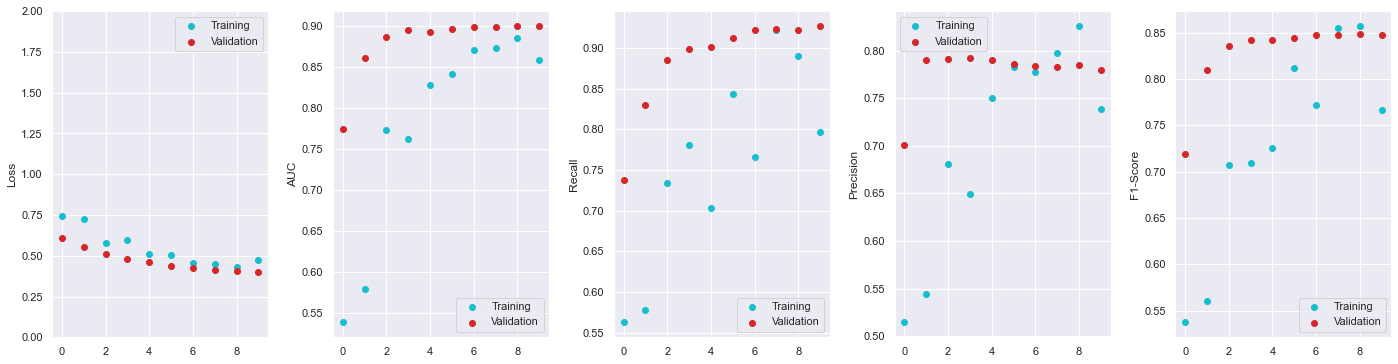

In [32]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_3percent_do50_lr0001.pkl')))

## Fine-tuned Model with 13 percent of Positive Class (640 total images)
Same as the case above, training with the lower learning rate we see stable training benefits. We may want to increase the number of epochs to determine
where the benefit of training ends (we always use early stopping but with patience of 15 epochs)
- **Learning Rate: 0.0001**
- **Drop Out Rate: 0.50**
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- Epochs: 10
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

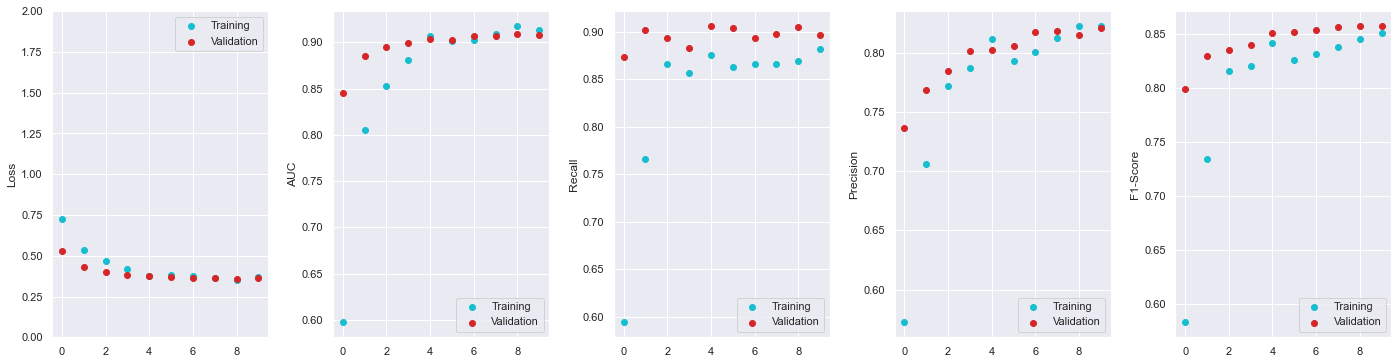

In [33]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_13percent_do50_lr0001.pkl')))

## Fine-tuned Model with 13 percent of Positive Class (640 total images)
As we noted above, the continued training, with a low learning rate, does appear to improve finetuned model performance. Our final model will be finetuned for 50 epochs with early stopping.
- **Learning Rate: 0.0001**
- **Drop Out Rate: 0.50**
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- **Epochs: 30**
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- Color Jitter Intensity Factor: 0.5
- Gaussian Blur Probability: 0.5

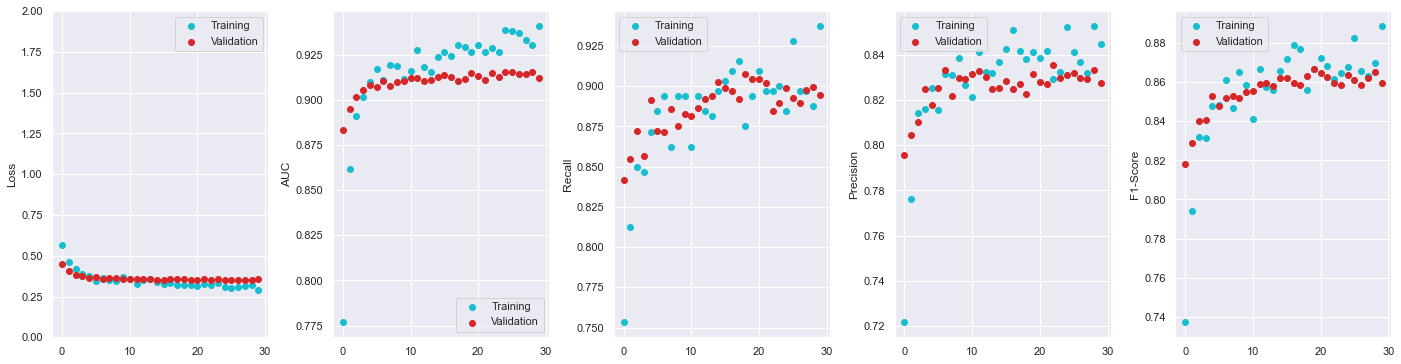

In [38]:
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_13percent_do50_lr0001_30ep.pkl')))

## Comparison of Color Jitter Intensity
## Fine-tuned Model with 3 percent of Positive Class (128 total images)
As we noted above, the continued training, with a low learning rate, does appear to improve finetuned model performance. Our final model will be finetuned for 50 epochs with early stopping.
- **Learning Rate: 0.0001**
- **Drop Out Rate: 0.50**
- Hidden 1 Dimension: 256
- Hidden 2 Dimension: 256
- Hidden Activation: ELU
### Unsupervised Parameters
- Temperature used in Softmax: 0.1
- Batch Size: 128
- **Epochs: 30**
- Projection Head 1: 1024 
- Projection Head 2: 512
- Final Dimension: 128
- Geometry Aug Probability: 1.0
- Rotation: 180
- X-Y Shift: 0.1
- Zoom Ratio: 0.2
- Grey Scale Probability: 0.20
- Color Jitter Probability: 0.80
- **Color Jitter Intensity Factor: 1.0, 0.75, 0.50, 0.25 (respectively for plots below - baseline assumption was 0.50)**
- Gaussian Blur Probability: 0.5

Intensity Factor of 1.0
Intensity Factor of 0.5


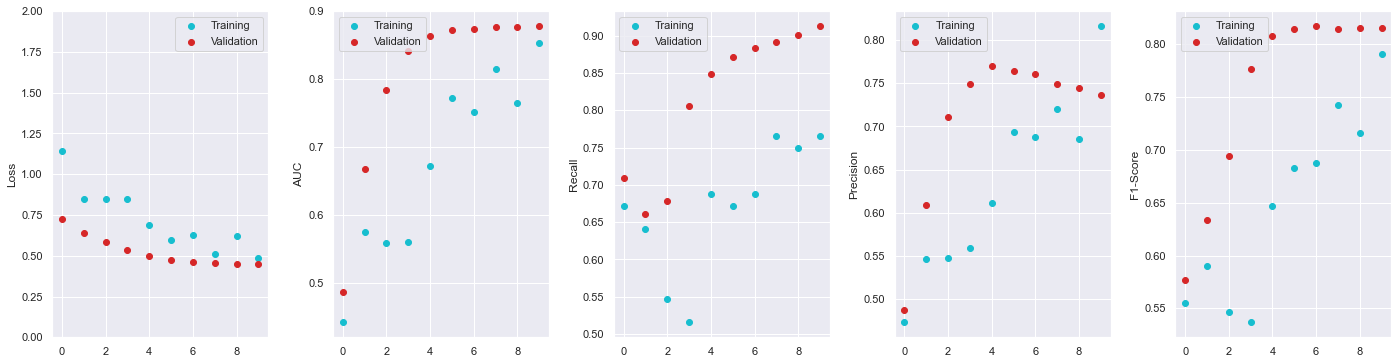

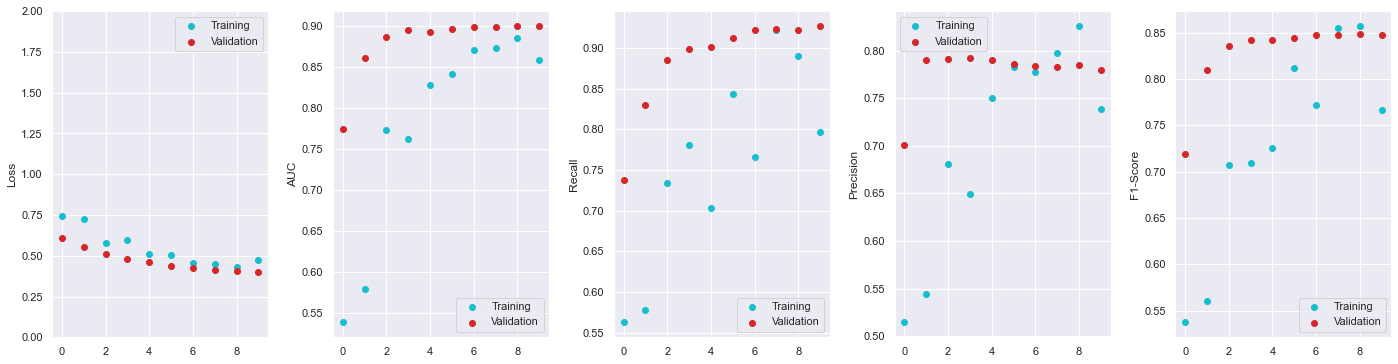

In [39]:
print("First Plot - Intensity Factor of 1.0")
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_3percent_do50_lr0001_s1.pkl')))
print("Third Plot - Intensity Factor of 0.5")
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_3percent_do50_lr0001.pkl')))
print("Fourth Plot - Intensity Factor of 0.25")
plot_metrics(pd.read_pickle(os.path.join(model_path, 'simclr_finetune_3percent_do50_lr0001_s25.pkl')))

# Cells below used for Determining Supervised Baseline
## Supervised Baseline: InceptionV3, Upsampled to 5x positive class, Balanced

In [4]:
inception_files = sorted([ file for file in os.listdir(model_path) if file[-3:]=='pkl' if 'inception' in file])

## Five balanced training runs with Inception V3
### Used different subsamples of negative class

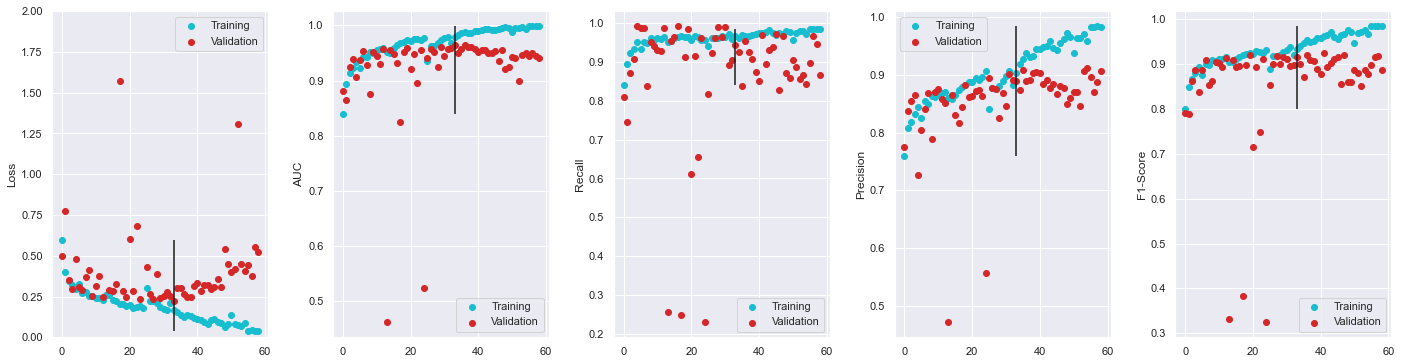

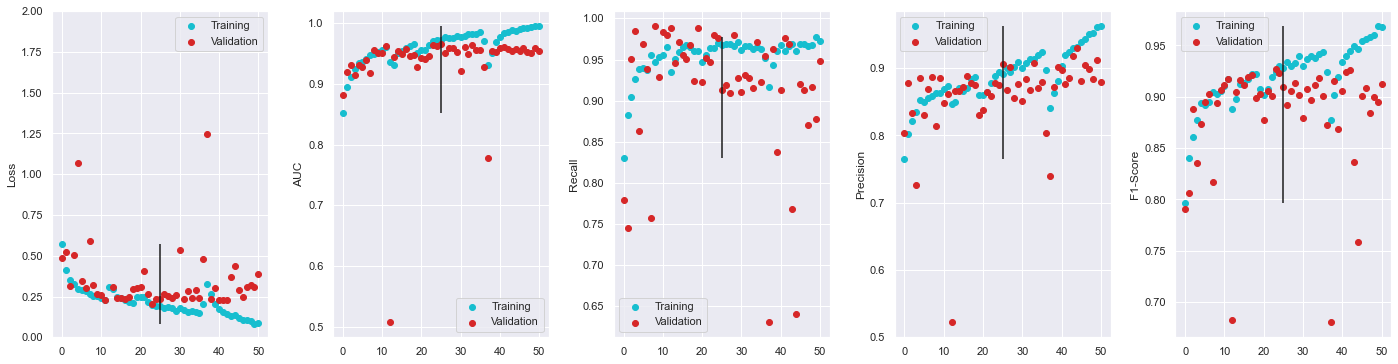

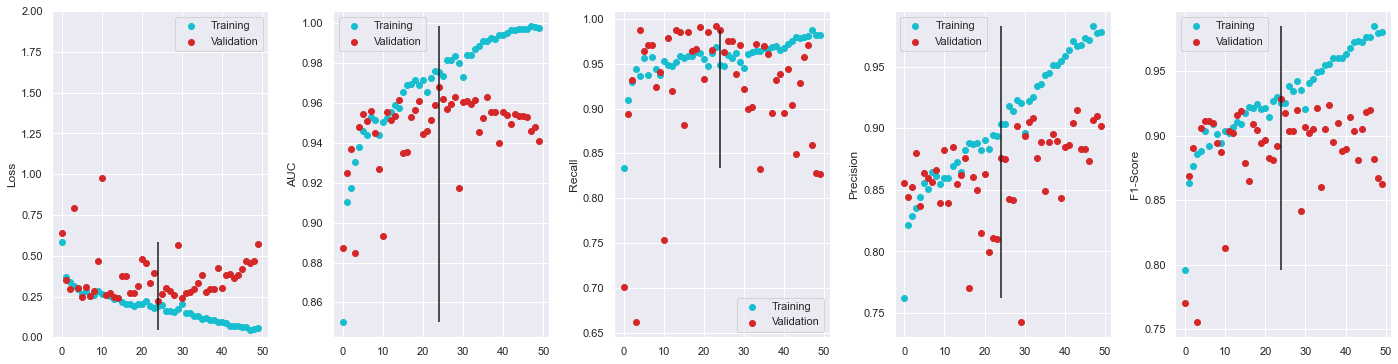

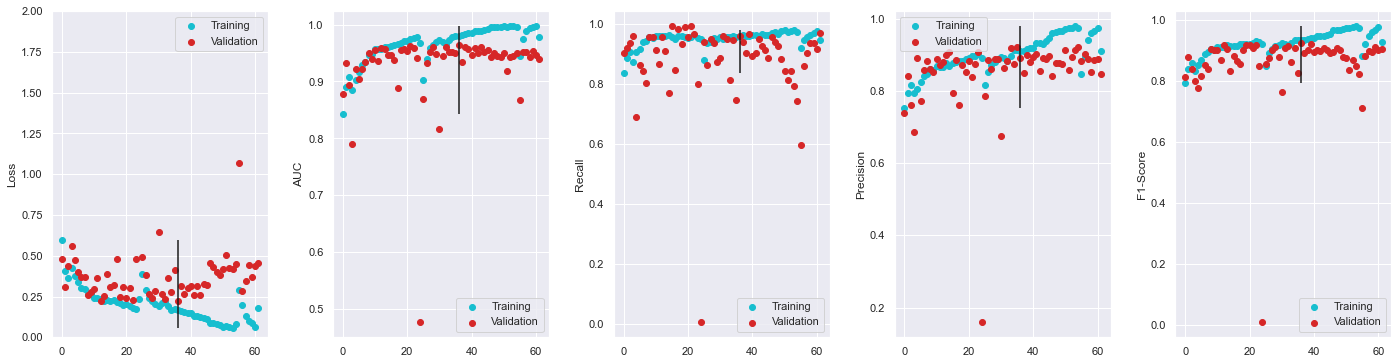

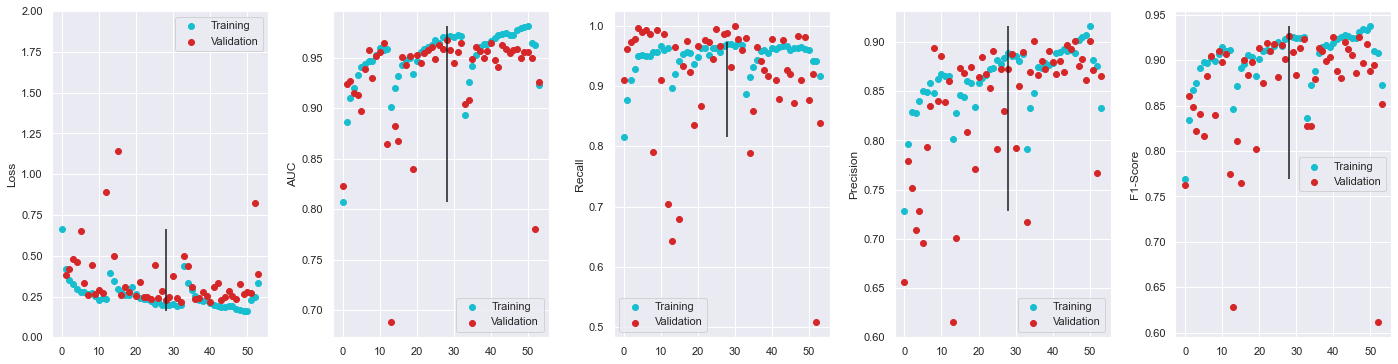

In [5]:
for file in inception_files:
    df = pd.read_pickle(os.path.join(model_path,file))
    plot_metrics(df)

In [6]:
resnet_files = sorted([ file for file in os.listdir(model_path) if file[-3:]=='pkl' if 'resnet' in file])

## Five balanced training runs with ResNet50
### Used different subsamples of negative class

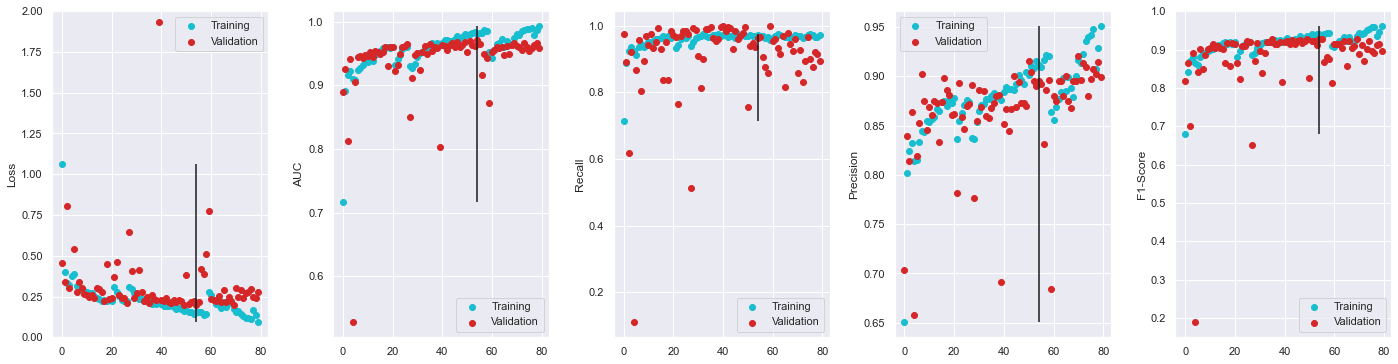

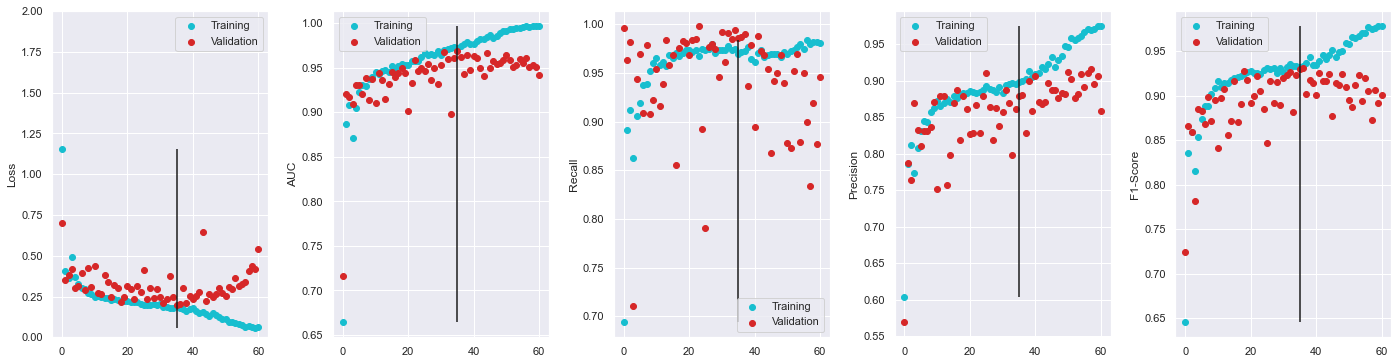

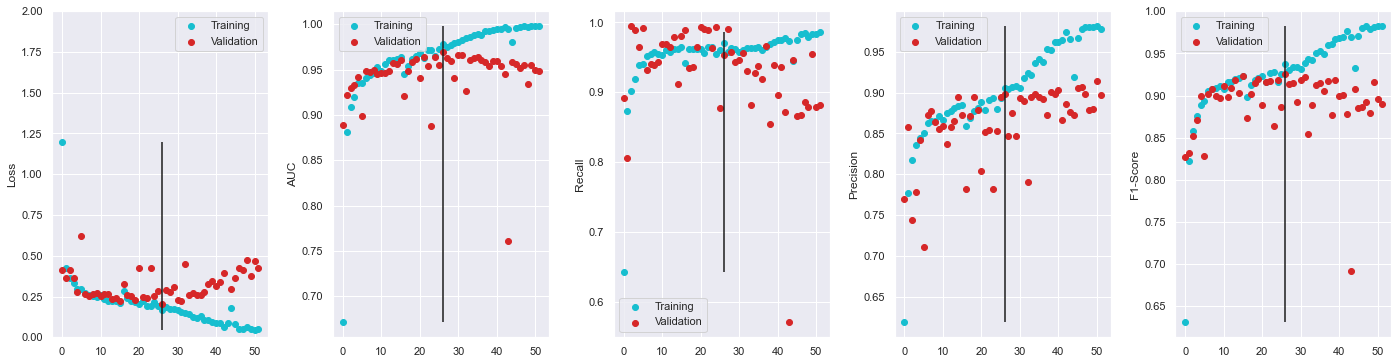

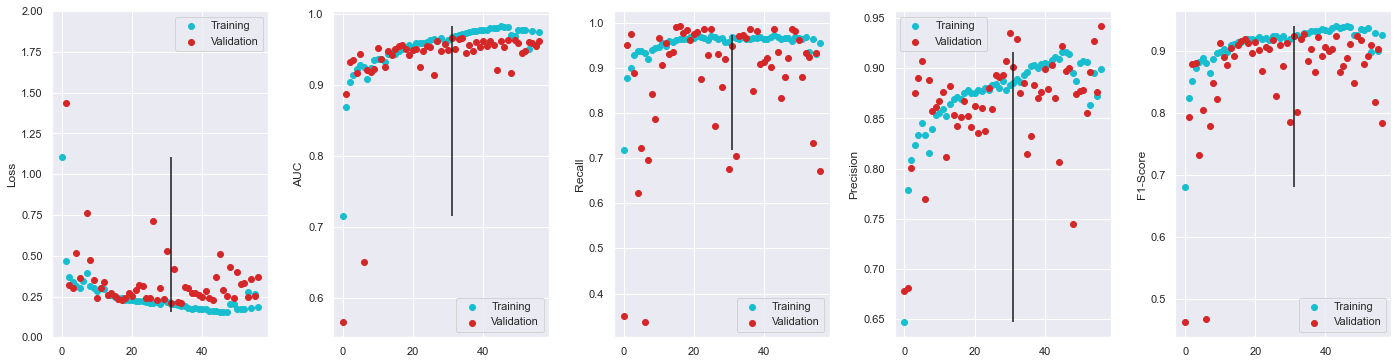

In [7]:
for file in resnet_files:
    df = pd.read_pickle(os.path.join(model_path,file))
    plot_metrics(df)

## Evaluate Against Test Set
### Requires TFRecords Processing Function Below

In [4]:
def read_tfrecord(example):

    BAND_STATS = {
            'mean': {
                'B01': 340.76769064,
                'B02': 429.9430203,
                'B03': 614.21682446,
                'B04': 590.23569706,
                'B05': 950.68368468,
                'B06': 1792.46290469,
                'B07': 2075.46795189,
                'B08': 2218.94553375,
                'B8A': 2266.46036911,
                'B09': 2246.0605464,
                'B11': 1594.42694882,
                'B12': 1009.32729131
            },
            'std': {
                'B01': 554.81258967,
                'B02': 572.41639287,
                'B03': 582.87945694,
                'B04': 675.88746967,
                'B05': 729.89827633,
                'B06': 1096.01480586,
                'B07': 1273.45393088,
                'B08': 1365.45589904,
                'B8A': 1356.13789355,
                'B09': 1302.3292881,
                'B11': 1079.19066363,
                'B12': 818.86747235
            }
        }

    
    
    # Use this one-liner to standardize each feature prior to reshaping.
    def standardize_feature(data, band_name):
      return  ((tf.dtypes.cast(data, tf.float32) - BAND_STATS['mean'][band_name]) / BAND_STATS['std'][band_name])
    
    
    # decode the TFRecord
    # The parse single example methods takes an example (from a tfrecords file),
    # and a dictionary that explains the data format of each feature.
    example = tf.io.parse_single_example(example, {
                    'B01': tf.io.FixedLenFeature([20*20], tf.int64),
                    'B02': tf.io.FixedLenFeature([120*120], tf.int64),
                    'B03': tf.io.FixedLenFeature([120*120], tf.int64),
                    'B04': tf.io.FixedLenFeature([120*120], tf.int64),
                    'B05': tf.io.FixedLenFeature([60*60], tf.int64),
                    'B06': tf.io.FixedLenFeature([60*60], tf.int64),
                    'B07': tf.io.FixedLenFeature([60*60], tf.int64),
                    'B08': tf.io.FixedLenFeature([120*120], tf.int64),
                    'B8A': tf.io.FixedLenFeature([60*60], tf.int64),
                    'B09': tf.io.FixedLenFeature([20*20], tf.int64),
                    'B11': tf.io.FixedLenFeature([60*60], tf.int64),
                    'B12': tf.io.FixedLenFeature([60*60], tf.int64),
                    'patch_name': tf.io.VarLenFeature(dtype=tf.string),
                    'original_labels': tf.io.VarLenFeature(dtype=tf.string),
                    'original_labels_multi_hot': tf.io.FixedLenFeature([43], tf.int64)
                })
    
    example['binary_label'] = example['original_labels_multi_hot'][tf.constant(12)]
       
    # After parsing our data into a tensor, let's standardize and reshape.
    reshaped_example = {
            'B01': tf.reshape(standardize_feature(example['B01'],'B01'), [20, 20]),
            'B02': tf.reshape(standardize_feature(example['B02'],'B02'), [120, 120]),
            'B03': tf.reshape(standardize_feature(example['B03'],'B03'), [120, 120]),
            'B04': tf.reshape(standardize_feature(example['B04'],'B04'), [120, 120]),
            'B05': tf.reshape(standardize_feature(example['B05'],'B05'), [60, 60]),
            'B06': tf.reshape(standardize_feature(example['B06'],'B06'), [60, 60]),
            'B07': tf.reshape(standardize_feature(example['B07'],'B07'), [60, 60]),
            'B08': tf.reshape(standardize_feature(example['B08'],'B08'), [120, 120]),
            'B8A': tf.reshape(standardize_feature(example['B8A'],'B8A'), [60, 60]),
            'B09': tf.reshape(standardize_feature(example['B09'],'B09'), [20, 20]),
            'B11': tf.reshape(standardize_feature(example['B11'],'B11'), [60, 60]),
            'B12': tf.reshape(standardize_feature(example['B12'],'B12'), [60, 60]),
            'patch_name': example['patch_name'],
            'original_labels': example['original_labels'],
            'original_labels_multi_hot': example['original_labels_multi_hot'],
            'binary_labels': example['binary_label']
        }
    

    # Next sort the layers by resolution
    bands_10m = tf.stack([reshaped_example['B04'],
                          reshaped_example['B03'],
                          reshaped_example['B02'],
                          reshaped_example['B08']], axis=2)
    
    bands_20m = tf.stack([reshaped_example['B05'],
                          reshaped_example['B06'],
                          reshaped_example['B07'],
                          reshaped_example['B8A'],
                          reshaped_example['B11'],
                          reshaped_example['B12']], axis=2)
    
    # Finally resize the 20m data and stack the bands together.
    img = tf.concat([bands_10m , tf.image.resize(bands_20m, [120, 120],method='bicubic')], axis=2)

    multi_hot_label = reshaped_example['original_labels_multi_hot']
    binary_label = reshaped_example['binary_labels']

    return img, binary_label

In [5]:
def get_batched_dataset(filenames, batch_size):
  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False

  dataset = tf.data.Dataset.list_files(filenames, shuffle=True)
  print(f'Filenames: {filenames}')
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.interleave(tf.data.TFRecordDataset, cycle_length=2, num_parallel_calls=1)
  dataset = dataset.shuffle(buffer_size=2048)
  
  dataset = dataset.map(read_tfrecord, num_parallel_calls=10)
  dataset = dataset.batch(batch_size, drop_remainder=False) # drop_remainder will be needed on TPU
  batched_dataset = tf.compat.v1.data.make_one_shot_iterator(dataset)
  
  return dataset
  
def get_training_dataset(training_filenames, batch_size):
  return get_batched_dataset(training_filenames, batch_size)

def get_validation_dataset(validation_filenames, batch_size):
  return get_batched_dataset(validation_filenames, batch_size)

def get_test_dataset(test_filenames, batch_size):
  return get_batched_dataset(test_filenames, batch_size)

## Function for Plotting Confusion Matrix

In [6]:
def plot_cm(name, labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title(f'{name}\nConfusion matrix @{threshold:.2f}')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total Images: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([85,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

## Look at Results with Balanced and Skewed Test Data Sets

In [7]:
balanced_test_data = get_test_dataset('./tfrecords/balanced_test.tfrecord', batch_size=32)
skewed_test_data = get_test_dataset('./tfrecords/10percent_test.tfrecord', batch_size=32)

Filenames: ./tfrecords/balanced_test.tfrecord
Filenames: ./tfrecords/10percent_test.tfrecord


In [9]:
inception_models = sorted([ file for file in os.listdir(model_path) if file[-2:]=='h5' if 'inception' in file])
print(inception_models)
resnet_models = sorted([ file for file in os.listdir(model_path) if file[-2:]=='h5' if 'resnet' in file])
print(resnet_models)

['pooled_inception_balanced_val_all.h5', 'pooled_inceptionv3_balanced_val_0.h5', 'pooled_inceptionv3_balanced_val_1.h5', 'pooled_inceptionv3_balanced_val_2.h5', 'pooled_inceptionv3_balanced_val_3.h5', 'pooled_inceptionv3_balanced_val_4.h5']
['pooled_resnet50_balanced_val_0.h5', 'pooled_resnet50_balanced_val_1.h5', 'pooled_resnet50_balanced_val_2.h5', 'pooled_resnet50_balanced_val_3.h5', 'pooled_resnet50_balanced_val_4.h5', 'pooled_resnet50_balanced_val_all.h5']


In [8]:
upsampled_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inception_balanced_val_all.h5'))
upsampled_rn_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_resnet50_balanced_val_all.h5'))

In [18]:
ens_predictions = []
inc_predictions = [] 
rn_predictions = []
labels = []
for image_batch, label_batch in balanced_test_data:
    p1 = upsampled_model.predict(image_batch)
    p2 = upsampled_rn_model.predict(image_batch)
    inc_predictions.append(p1)
    rn_predictions.append(p2)
    ens_predictions.append(np.mean([p1,p2],axis=0))
    labels.append(label_batch.numpy())
labels_array = np.concatenate(labels)
inc_pred_array = np.concatenate(inc_predictions)
rn_pred_array = np.concatenate(rn_predictions)
ens_pred_array = np.concatenate(ens_predictions)
    


W1010 15:34:48.409590 4471250368 def_function.py:120] 7 out of the last 742 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fa0d62ee680> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W1010 15:34:49.804481 4471250368 def_function.py:120] 8 out of the last 743 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fa0e991c8c0> triggered tf.function retracing. Traci

True Negatives:  2124
False Positives:  251
False Negatives:  96
True Positives:  2279
Total Images:  2375


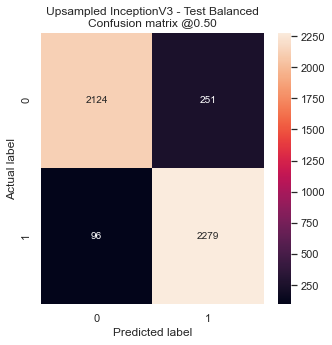

In [19]:
 plot_cm(f"Upsampled InceptionV3 - Test Balanced", labels_array, inc_pred_array)

True Negatives:  2104
False Positives:  271
False Negatives:  92
True Positives:  2283
Total Images:  2375


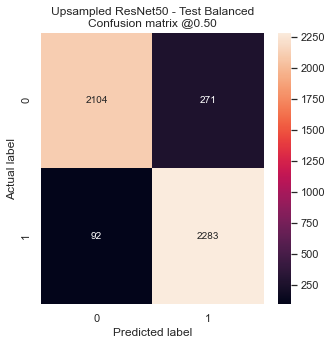

In [20]:
 plot_cm(f"Upsampled ResNet50 - Test Balanced", labels_array, rn_pred_array)

True Negatives:  2115
False Positives:  260
False Negatives:  74
True Positives:  2301
Total Images:  2375


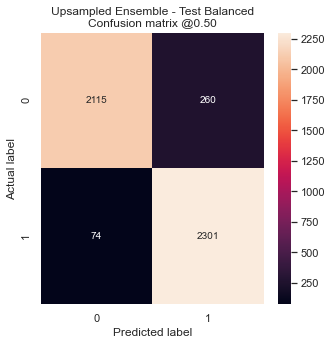

In [21]:
 plot_cm(f"Upsampled Ensemble - Test Balanced", labels_array, ens_pred_array)

## Compare Resnet vs Inception
### Ensemble Model (vote from five different models) performs basically the same as Upsampled Model
### Upsampled Model will be Supervised Baseline due to it being simpler

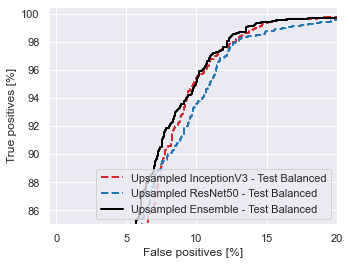

In [22]:
plot_roc(f"Upsampled InceptionV3 - Test Balanced", labels_array, inc_pred_array, color='tab:red', linestyle='--')
plot_roc(f"Upsampled ResNet50 - Test Balanced", labels_array, rn_pred_array, color='tab:blue', linestyle='--')
plot_roc(f"Upsampled Ensemble - Test Balanced", labels_array, ens_pred_array, color='black', linestyle='-')
plt.legend(loc='lower right')

In [193]:
ens_predictions_skewed = []
inc_predictions_skewed = [] 
rn_predictions_skewed = []
labels_skewed = []
for image_batch, label_batch in skewed_test_data:
    p1 = upsampled_model.predict(image_batch)
    p2 = upsampled_rn_model.predict(image_batch)
    inc_predictions_skewed.append(p1)
    rn_predictions_skewed.append(p2)
    ens_predictions_skewed.append(np.mean([p1,p2],axis=0))
    labels_skewed.append(label_batch.numpy())
skewed_labels_array = np.concatenate(labels_skewed)
skewed_inc_pred_array = np.concatenate(inc_predictions_skewed)
skewed_rn_pred_array = np.concatenate(rn_predictions_skewed)
skewed_ens_pred_array = np.concatenate(ens_predictions_skewed)

True Negatives:  19001
False Positives:  2374
False Negatives:  96
True Positives:  2279
Total Images:  2375


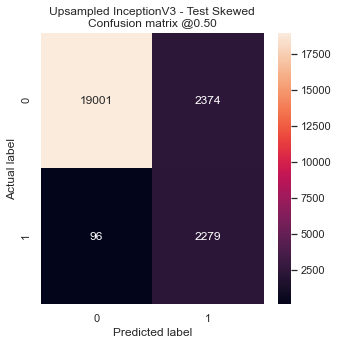

In [194]:
 plot_cm(f"Upsampled InceptionV3 - Test Skewed", skewed_labels_array, skewed_inc_pred_array)

True Negatives:  18801
False Positives:  2574
False Negatives:  92
True Positives:  2283
Total Images:  2375


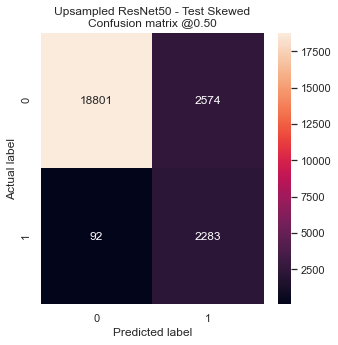

In [195]:
 plot_cm(f"Upsampled ResNet50 - Test Skewed", skewed_labels_array, skewed_rn_pred_array)

True Negatives:  18931
False Positives:  2444
False Negatives:  74
True Positives:  2301
Total Images:  2375


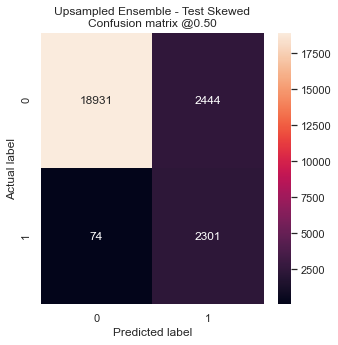

In [196]:
 plot_cm(f"Upsampled Ensemble - Test Skewed", skewed_labels_array, skewed_ens_pred_array)

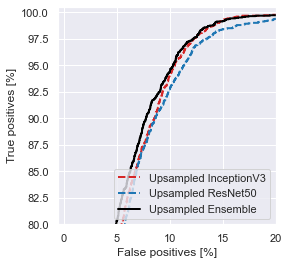

In [197]:
plot_roc(f"Upsampled InceptionV3", skewed_labels_array, skewed_inc_pred_array, color='tab:red', linestyle='--')
plot_roc(f"Upsampled ResNet50", skewed_labels_array, skewed_rn_pred_array, color='tab:blue', linestyle='--')
plot_roc(f"Upsampled Ensemble", skewed_labels_array, skewed_ens_pred_array, color='black', linestyle='-')
plt.legend(loc='lower right')

## Generate Predictions for Ensemble of Balanced Learners
We trained five models using different samples of negative examples. We average the predictions to determine a less variant prediction.

In [9]:
i0_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_0.h5'))
i1_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_1.h5'))
i2_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_2.h5'))
i3_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_3.h5'))
i4_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_4.h5'))

ens_predictions = []
inc0_predictions = [] 
inc1_predictions = [] 
inc2_predictions = [] 
inc3_predictions = [] 
inc4_predictions = [] 
incup_predictions = []

labels = []
for image_batch, label_batch in balanced_test_data:
    p0 = i0_model.predict(image_batch)
    p1 = i1_model.predict(image_batch)
    p2 = i2_model.predict(image_batch)
    p3 = i3_model.predict(image_batch)
    p4 = i4_model.predict(image_batch)
    pup = upsampled_model.predict(image_batch)
    inc0_predictions.append(p0)
    inc1_predictions.append(p1)
    inc2_predictions.append(p2)
    inc3_predictions.append(p3)
    inc4_predictions.append(p4)
    incup_predictions.append(pup)
    ens_predictions.append(np.mean([p0,p1,p2,p3,p4],axis=0))
    labels.append(label_batch.numpy())
# Create array of actual lables
labels_array = np.concatenate(labels)

# Create the five arrays of predicitons
# One for each model that was generated with different negative examples
inc0_pred_array = np.concatenate(inc0_predictions)
inc1_pred_array = np.concatenate(inc1_predictions)
inc2_pred_array = np.concatenate(inc2_predictions)
inc3_pred_array = np.concatenate(inc3_predictions)
inc4_pred_array = np.concatenate(inc4_predictions)

# Create an ensemble array using the average prediction
ens_pred_array = np.concatenate(ens_predictions)

# Create the upsampled predictions array
up_pre_array = np.concatenate(incup_predictions)

W1017 10:50:26.974182 4479057344 def_function.py:120] 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f94a5a0fe60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
W1017 10:50:28.532803 4479057344 def_function.py:120] 6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f9495bef680> triggered tf.function retracing. Tracing i

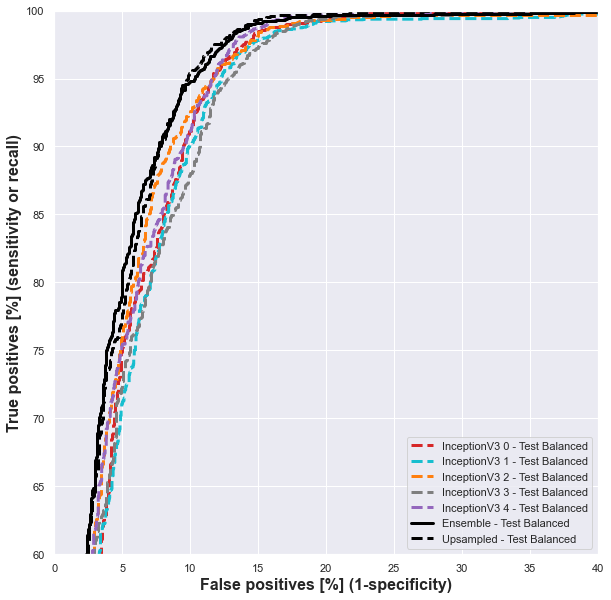

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_roc_full(f"InceptionV3 0 - Test Balanced", labels_array, inc0_pred_array, color='tab:red', linestyle='--')
plot_roc_full(f"InceptionV3 1 - Test Balanced", labels_array, inc1_pred_array, color='tab:cyan', linestyle='--')
plot_roc_full(f"InceptionV3 2 - Test Balanced", labels_array, inc2_pred_array, color='tab:orange', linestyle='--')
plot_roc_full(f"InceptionV3 3 - Test Balanced", labels_array, inc3_pred_array, color='tab:gray', linestyle='--')
plot_roc_full(f"InceptionV3 4 - Test Balanced", labels_array, inc4_pred_array, color='tab:purple', linestyle='--')
plot_roc_full(f"Ensemble - Test Balanced", labels_array, ens_pred_array, color='black', linestyle='-')
plot_roc_full(f"Upsampled - Test Balanced", labels_array, up_pre_array, color='black', linestyle='--')
plt.legend(loc='lower right')

## Evaluation of Data Augmentation Techniques
We evaluate different augmentation techniques to determine which may be viable for use with our SimCLR unclassified learning process. We are looking for augmentation techniques that do not greatly reduce the efficacy of our model's ability to learn. If they do that would indicate the augmentation technique is destroying valuable information in our inputs.

In [8]:
i0_model = tf.keras.models.load_model(os.path.join(model_path, 'pooled_inceptionv3_balanced_val_0.h5'))
i0_shift_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_shift_0.h5'))
i0_blur_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_blur_0.h5'))
i0_cs_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_chanshift_0.h5'))
i0_all_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_all_df_0.h5'))
i0_allsimclr_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_simclr_df_0.h5'))

In [42]:
labels = []
inc0_predictions = [] 
shift0_predictions= []
blur0_predictions= []
cs0_predictions = []
all0_predictions = []
simclr0_predictions = []
for image_batch, label_batch in balanced_test_data:
    shift0 = i0_shift_model.predict(image_batch)
    cs0 = i0_cs_model.predict(image_batch)
    blur0 = i0_blur_model.predict(image_batch)
    p0 = i0_model.predict(image_batch)
    all0 = i0_all_model.predict(image_batch)
    simclr0 = i0_simclr_model.predict(image_batch)
    simclr0_predictions.append(simclr0)
    inc0_predictions.append(p0)
    blur0_predictions.append(blur0)
    shift0_predictions.append(shift0)
    cs0_predictions.append(cs0)
    all0_predictions.append(all0)
    labels.append(label_batch.numpy())
# Create array of actual lables
labels_array = np.concatenate(labels)

# Create the five arrays of predicitons
# One for each model that was generated with different negative examples
shift0_pred_array = np.concatenate(shift0_predictions)
cs0_pred_array = np.concatenate(cs0_predictions)
blur0_pred_array = np.concatenate(blur0_predictions)
inc0_pred_array = np.concatenate(inc0_predictions)
all0_pred_array = np.concatenate(all0_predictions)
simclr0_pred_array = np.concatenate(simclr0_predictions)

In [11]:
def plot_roc_full(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=3, **kwargs)
  plt.xlabel('False positives [%] (1-specificity)', fontweight='bold', fontsize=16)
  plt.ylabel('True positives [%] (sensitivity or recall)', fontweight='bold', fontsize=16)
  plt.xlim([0,40])
  plt.ylim([60,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

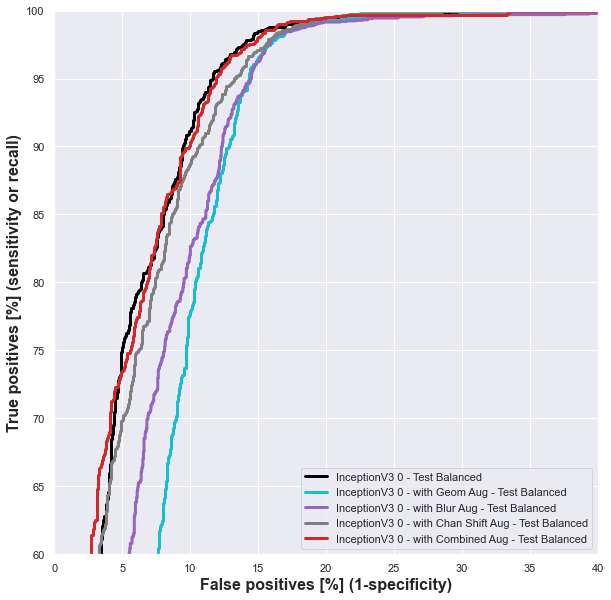

In [61]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_roc_full(f"InceptionV3 0 - Test Balanced", labels_array, inc0_pred_array, color='black')
plot_roc_full(f"InceptionV3 0 - with Geom Aug - Test Balanced", labels_array, shift0_pred_array, color='tab:cyan')
plot_roc_full(f"InceptionV3 0 - with Blur Aug - Test Balanced", labels_array, blur0_pred_array, color='tab:purple')
plot_roc_full(f"InceptionV3 0 - with Chan Shift Aug - Test Balanced", labels_array, cs0_pred_array, color='tab:gray')
plot_roc_full(f"InceptionV3 0 - with Combined Aug - Test Balanced", labels_array, all0_pred_array, color='tab:red')
plt.legend(loc='lower right')

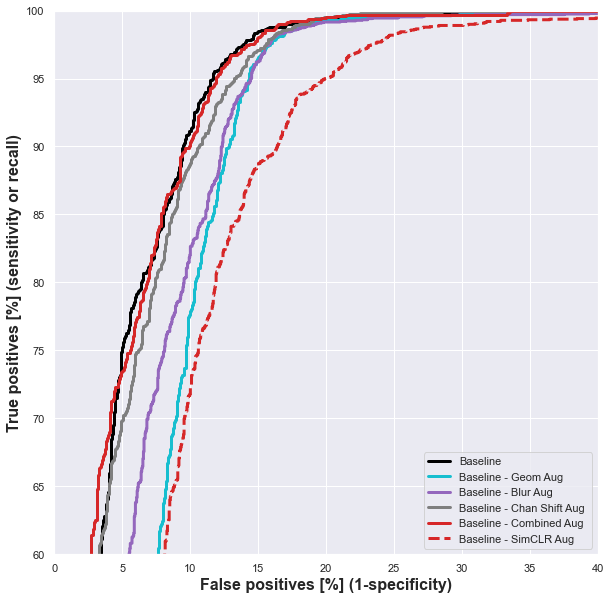

In [62]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_roc_full(f"Baseline", labels_array, inc0_pred_array, color='black')
plot_roc_full(f"Baseline - Geom Aug", labels_array, shift0_pred_array, color='tab:cyan')
plot_roc_full(f"Baseline - Blur Aug", labels_array, blur0_pred_array, color='tab:purple')
plot_roc_full(f"Baseline - Chan Shift Aug ", labels_array, cs0_pred_array, color='tab:gray')
plot_roc_full(f"Baseline - Combined Aug", labels_array, all0_pred_array, color='tab:red')
plot_roc_full(f"Baseline - SimCLR Aug", labels_array, simclr0_pred_array, color='tab:red', linestyle='--')
plt.legend(loc='lower right')

In [64]:
simclr2_model = tf.keras.models.load_model(os.path.join(model_path, 'bl_inc_aug_simclr2_0.h5'))

labels2 = []
simclr20_predictions = []
for image_batch, label_batch in balanced_test_data:
    simclr20 = simclr2_model.predict(image_batch)
    simclr20_predictions.append(simclr20)
    labels2.append(label_batch.numpy())
# Create array of actual lables
labels_array2 = np.concatenate(labels2)

# Create the five arrays of predicitons
# One for each model that was generated with different negative examples
simclr20_pred_array = np.concatenate(simclr20_predictions)

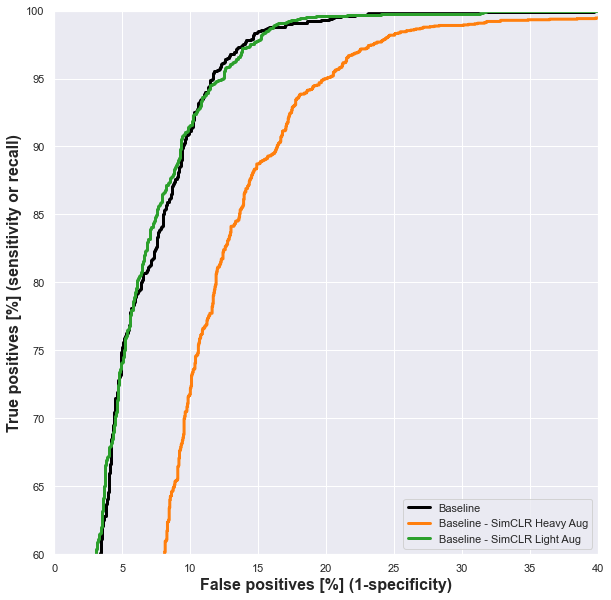

In [69]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_roc_full(f"Baseline", labels_array, inc0_pred_array, color='black')
#plot_roc_full(f"Baseline - Geom Aug", labels_array, shift0_pred_array, color='tab:cyan')
#plot_roc_full(f"Baseline - Blur Aug", labels_array, blur0_pred_array, color='tab:purple')
#plot_roc_full(f"Baseline - Chan Shift Aug ", labels_array, cs0_pred_array, color='tab:gray')
#plot_roc_full(f"Baseline - Combined Aug", labels_array, all0_pred_array, color='tab:red')
plot_roc_full(f"Baseline - SimCLR Heavy Aug", labels_array, simclr0_pred_array, color='tab:orange', linestyle='-')
plot_roc_full(f"Baseline - SimCLR Light Aug", labels_array2, simclr20_pred_array, color='tab:green', linestyle='-')
plt.legend(loc='lower right')